# Projek 1
## Temat:
#### Wykonaj wykresy czasowe w formie interaktywnej z możliwością wyboru co najmniej dwóch serii danych na wykresie. Dla danych wykonaj wizualizację braków danych. Uzasadnij wybrane narzędzia, zinterpretuj rezultaty prac.
#### Alicja Osam-Gyaabin, Mijołaj Zawada, Karol Kociołek

In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import show
from bokeh.layouts import column, row
from bokeh.models import Select, CustomJS, Slider, PreText, Legend
import matplotlib.pyplot as plt
import random
import missingno as msno

In [10]:
df = pd.read_csv('cleaned_weather.csv')
df['date'] = pd.to_datetime(df['date'])

In [11]:
source = ColumnDataSource(df)

TITLE = 'weather'
output_file(TITLE + ".html")

p = figure(width=1400, height=900, x_axis_type='datetime', title=TITLE)
p.toolbar.logo = "grey"
p.background_fill_color = "#dddddd"
p.xaxis.axis_label = "Datetime"
p.grid.grid_line_color = "white"

line1 = p.line(x='date', y='p', source=source, legend_label='Zmienna 1', color='red')
line2 = p.line(x='date', y='p', source=source, legend_label='Zmienna 2', color='blue')

ys = Select(title='Zmienna 1', value='p', options=df.columns.tolist()[1:])
zs = Select(title='Zmienna 2', value='p', options=df.columns.tolist()[1:])

callback1 = CustomJS(args=dict(source=source, p=p, line=line1, sel1=ys), code="""
    var data = source.data;
    var selected_col = sel1.value;
    
    // Aktualizowanie y w linii wykresu na podstawie wybranej kolumny
    line.glyph.y = {field: selected_col};
    
    source.change.emit();
""")

callback2 = CustomJS(args=dict(source=source, p=p, line=line2, sel1=zs), code="""
    var data = source.data;
    var selected_col = sel1.value;
    
    // Aktualizowanie y w linii wykresu na podstawie wybranej kolumny
    line.glyph.y = {field: selected_col};
    
    source.change.emit();
""")

ys.js_on_change('value', callback1)
zs.js_on_change('value', callback2)

controls = column(ys, zs)
layout = row(controls, p)

p.legend.click_policy = 'hide'

show(layout)

In [13]:
columns_to_modify = df.columns[df.columns != 'date']

selected_columns = random.sample(list(columns_to_modify), 5)

def introduce_missing_values(df, selected_columns, min_weeks=1, max_weeks=4):
    for col in selected_columns:
        num_missing = random.randint(min_weeks, max_weeks) * 7 * 24 * 60 // 10
        
        start_idx = random.randint(0, len(df) - num_missing)
        
        df.loc[start_idx:start_idx + num_missing - 1, col] = np.nan
        
    return df

df2 = introduce_missing_values(df.copy(), selected_columns)
columns_to_modify = df2.columns[df2.columns != 'date']

for column in columns_to_modify:
    nan_indices = np.random.choice(df2.index, size=int(random.randint(1,10) * 0.015 * len(df2)), replace=False)
    df2.loc[nan_indices, column] = np.nan

In [14]:
(df2.isna().sum()/len(df2))*100

date         0.000000
p           11.999013
T           10.757932
Tpot        14.999241
Tdew         7.499620
rh           7.499620
VPmax        8.998785
VPact        9.283437
VPdef       16.602778
sh           2.998330
H2OC         4.499393
rho          2.998330
wv          13.976393
max. wv      7.499620
wd          15.137771
rain        14.999241
raining      1.499165
SWDR         1.499165
PAR          2.998330
max. PAR    13.498178
Tlog        13.498178
dtype: float64

<Axes: >

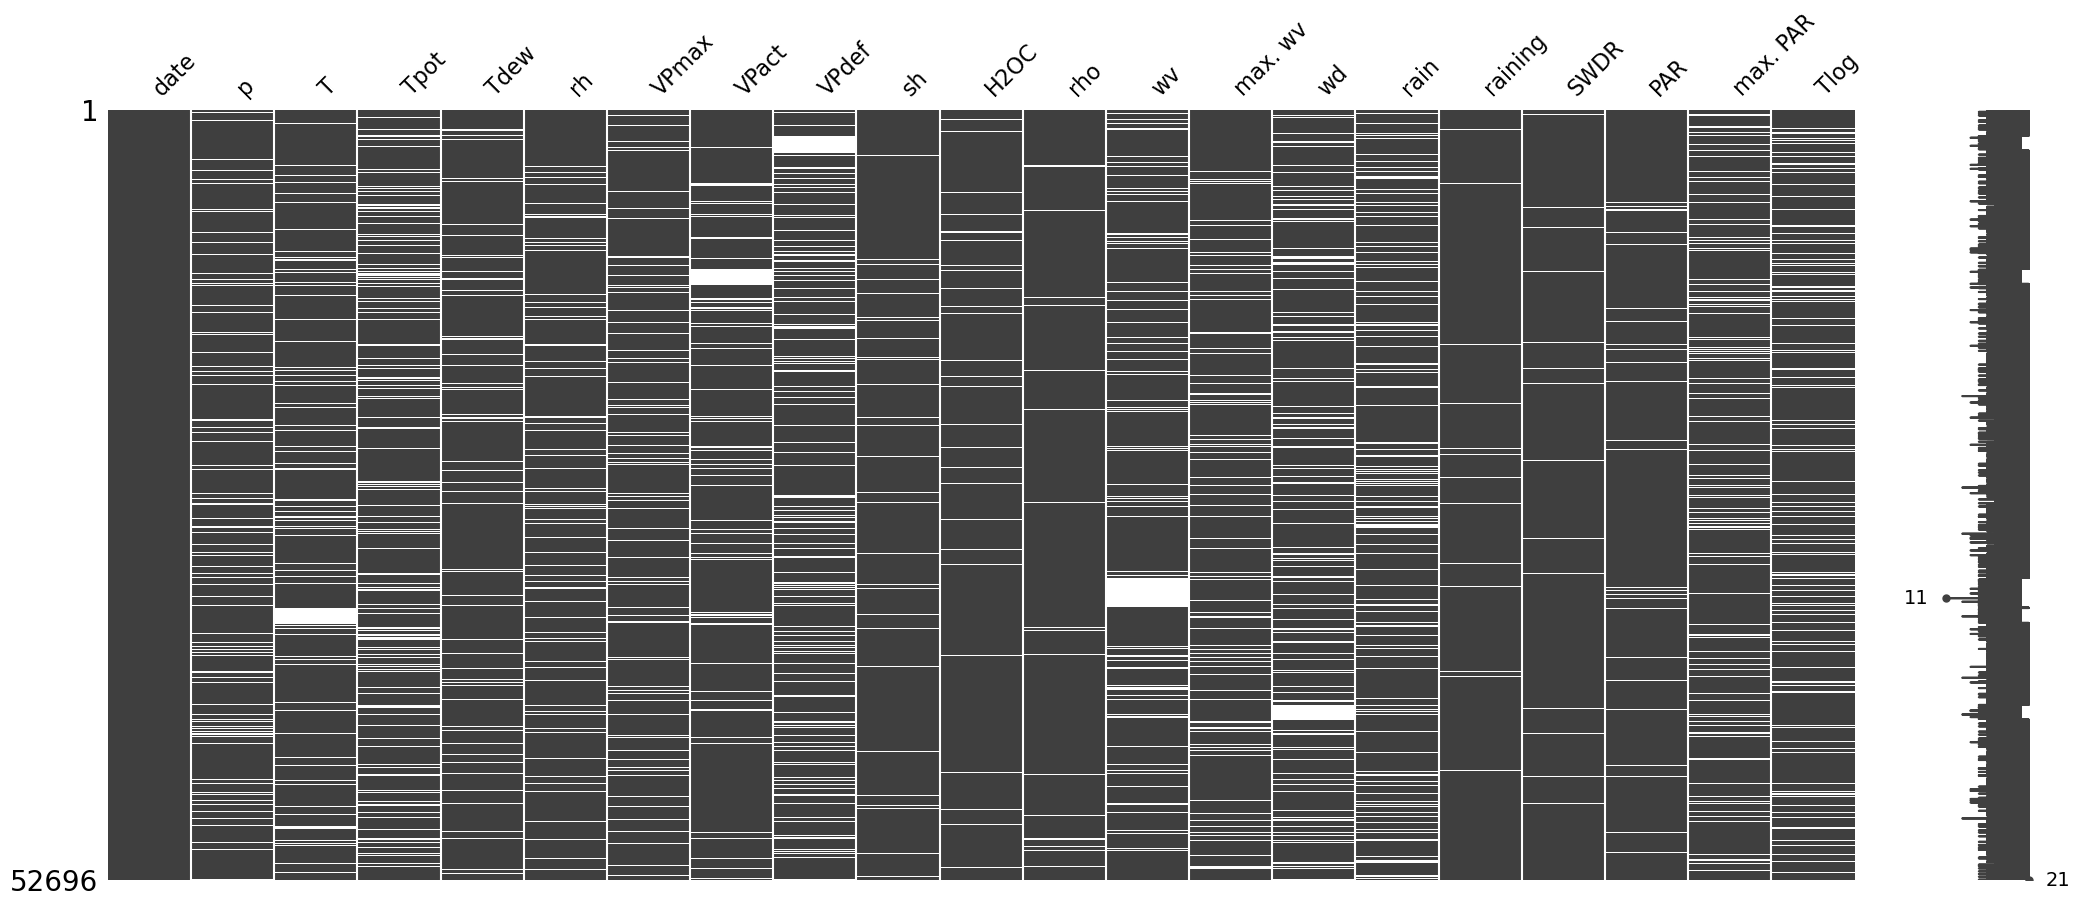

In [15]:
msno.matrix(df2)

<Axes: >

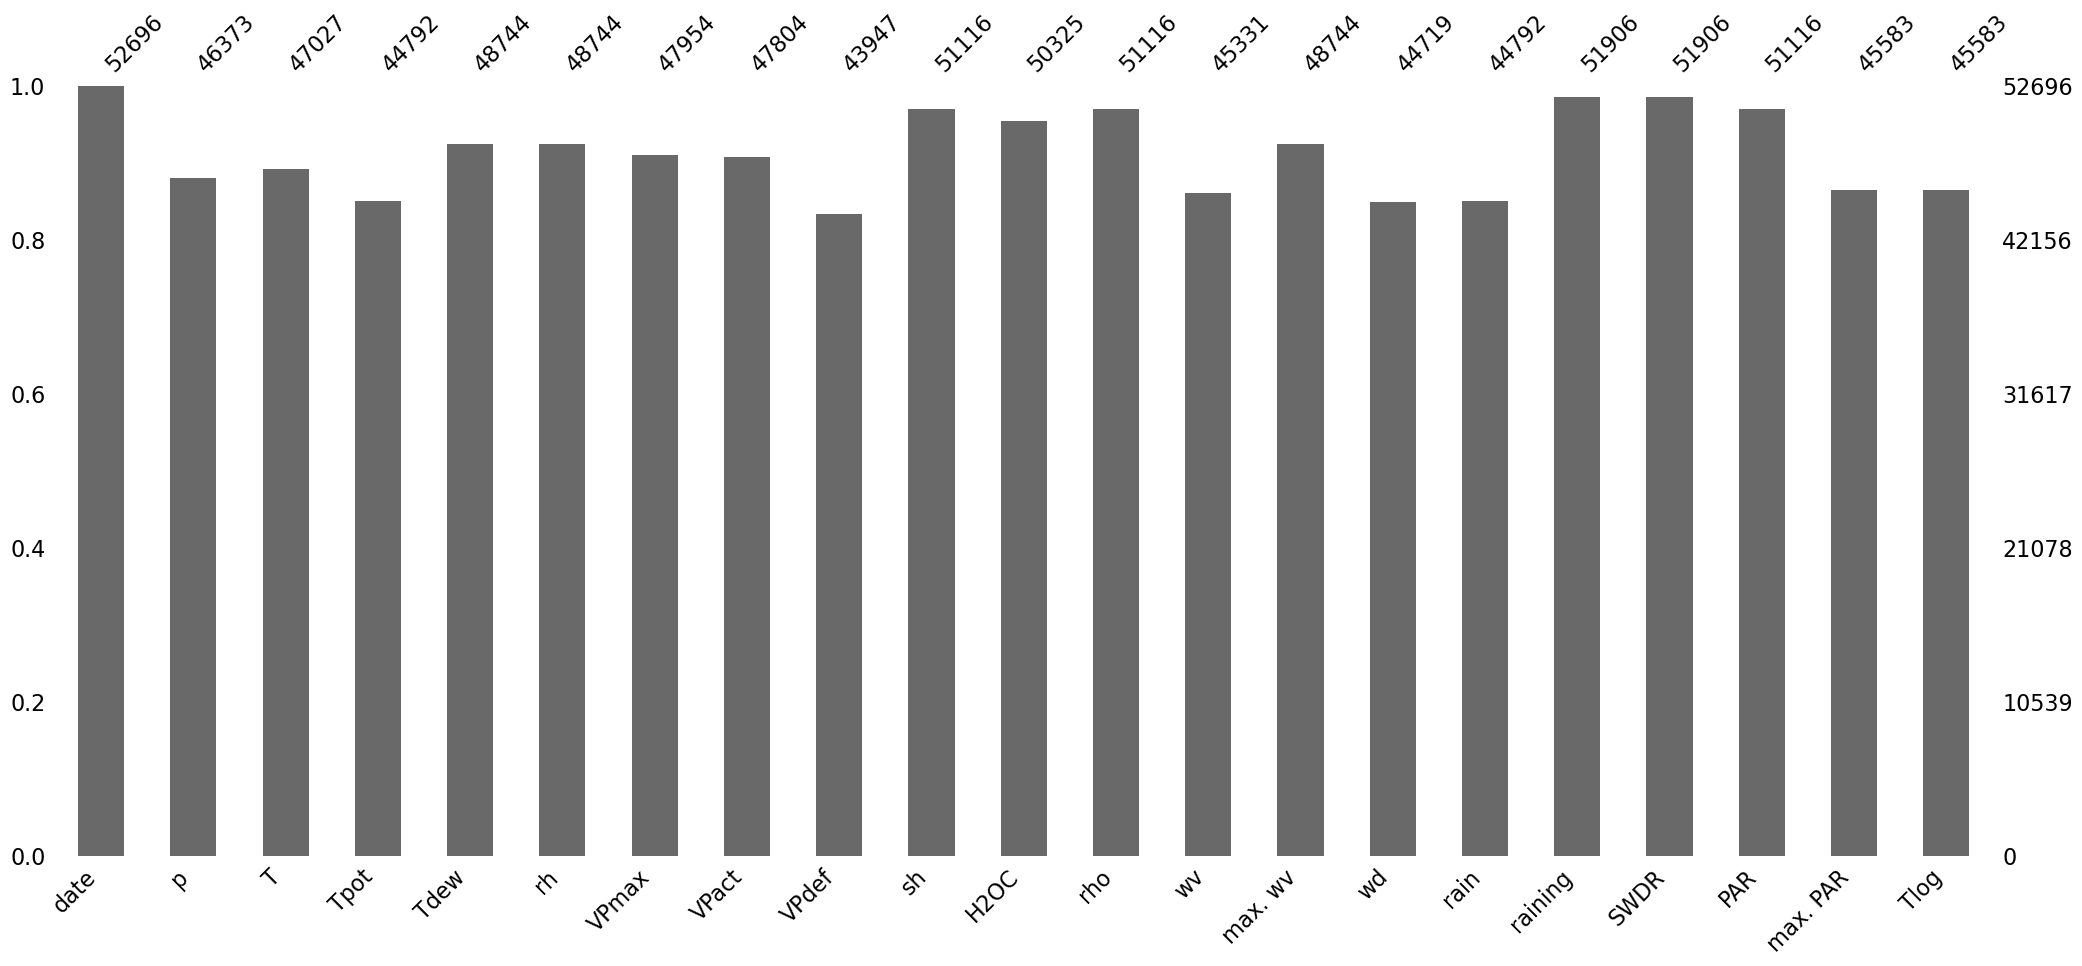

In [16]:
msno.bar(df2)

In [17]:
df3 = df2.style.highlight_null(props="background-color: yellow;")

with pd.ExcelWriter('nuls.xlsx', engine='openpyxl') as writer:
    df3.to_excel(writer, index=False, sheet_name='Sheet1')

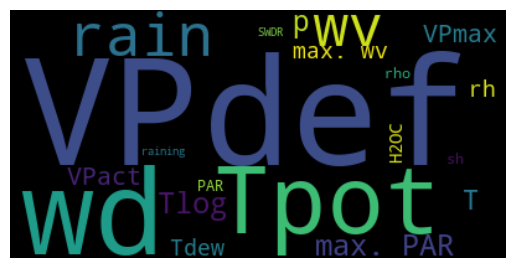

In [23]:
from wordcloud import WordCloud
f_dict = ( df2.isna().sum()/len(df2)).to_dict() 
wc = WordCloud()
wc.generate_from_frequencies(f_dict)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()